# AAI-510 M2 Lab Walkthrough — Tree based algorithms

In this lab walkthrough we will build the Decision Tree, Random Forest, and Gradient Boosted Trees. We will visualize trees, prune them and study the effects of parameters. Finally, we will analyze the results.

In [1]:
#@title Loading the required libraries
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline

from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers

### Data Processing

In [2]:
#Loading the dataset
IS_LOCAL = False

import os

if(IS_LOCAL):
    PATH="/Users/vlaxamana/Documents/home-credit-default-risk"
else:
    PATH="/Users/vlaxamana/Documents/home-credit-default-risk"
print(os.listdir(PATH))

['application_test.csv', '.DS_Store', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv(PATH+"/application_train.csv")
application_test = pd.read_csv(PATH+"/application_test.csv")
bureau = pd.read_csv(PATH+"/bureau.csv")
bureau_balance = pd.read_csv(PATH+"/bureau_balance.csv")
credit_card_balance = pd.read_csv(PATH+"/credit_card_balance.csv")
installments_payments = pd.read_csv(PATH+"/installments_payments.csv")
previous_application = pd.read_csv(PATH+"/previous_application.csv")
POS_CASH_balance = pd.read_csv(PATH+"/POS_CASH_balance.csv")

In [ ]:
#@title Designating target and features
y = df.Outcome # Target variable
X = df.drop(columns=['Outcome']) # Features by dropping the target column

In [ ]:
#@title Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Decision Tree

In [ ]:
#@title Building the Decision Tree
clf = tree.DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer

In [ ]:
#@title Evaluating the Tree model
y_hat = clf.predict(X_train) # Predict the response for train dataset

y_pred = clf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.7186147186147186


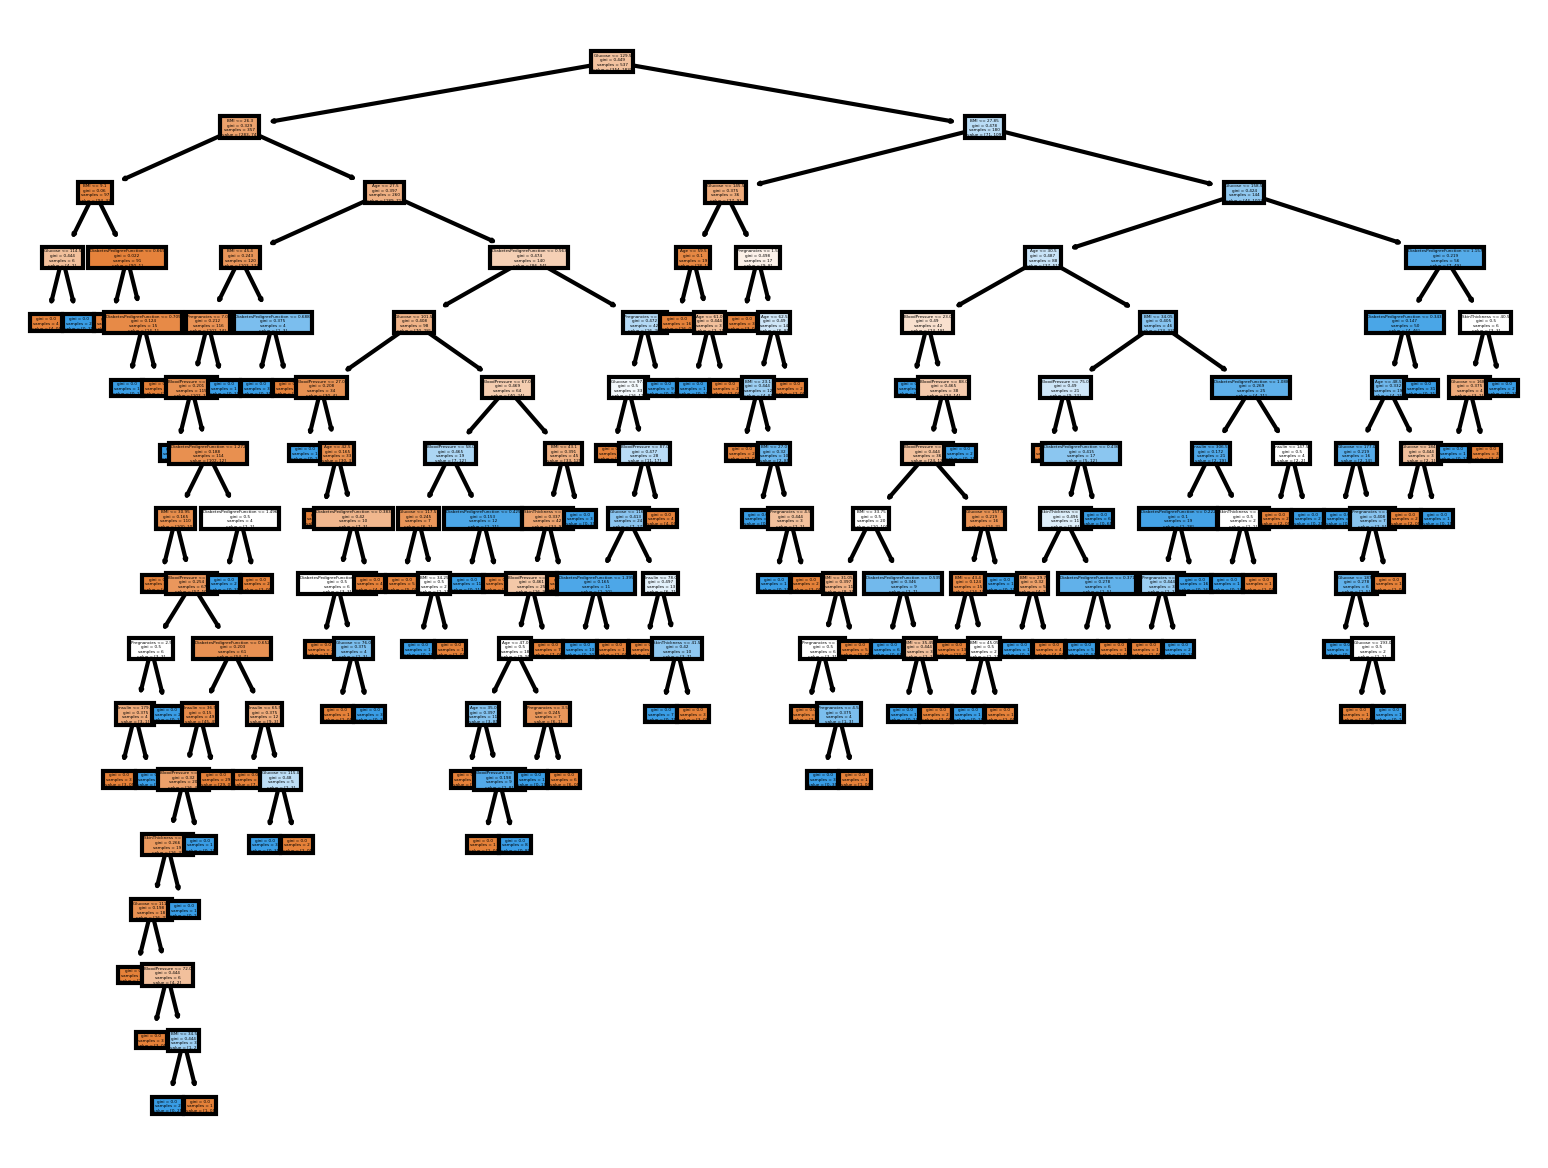

In [ ]:
#@title Visualizing the Tree

f_names=list(X.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text

### Tuning the Tree

There are several parameters that can be adjusted to obtain a suitable tree such as ``criterion``, ``max_depth``, ``min_samples_leaf``, etc. Typically, the tree depth has the greatest impact on accuracy and generalization

Train Accuracy: 0.7635009310986964
Test Accuracy: 0.7575757575757576


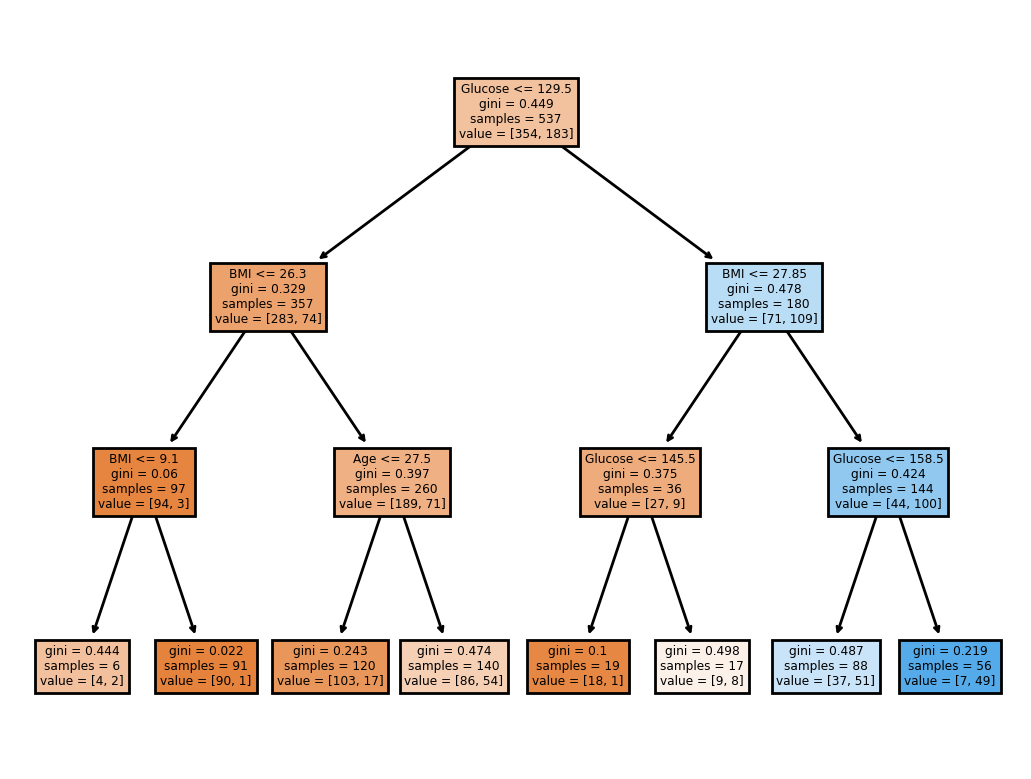

In [ ]:
# Create Decision Tree classifer object by spefifying parameters
# Try using max_depth=3, min_samples_split=100, min_samples_leaf=20, criterion="entropy"
clf = tree.DecisionTreeClassifier(max_depth=3) 

# Train and test the classifier
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer
y_hat = clf.predict(X_train) # Predict the response for train dataset
y_pred = clf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.rcParams['figure.dpi'] = 200 # To increase the resolution from 100dpi to 200dpi

# Plot the tree
f_names=list(X.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text

## Random Forest
Single trees are prone to bias, instability and overfitting. Randowm forests remedey these shortcomings by building an ensamble of deep trees on different subsets of the training data.

In [ ]:
#@title Building the Random Forest
rf = RandomForestClassifier(random_state=0) # Create Fandom Forest classifer object
rf = rf.fit(X_train, y_train) # Train Random Forest Classifer

In [ ]:
#@title Evaluating the RF model
y_hat = rf.predict(X_train) # Predict the response for train dataset

y_pred = rf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.7835497835497836


In [ ]:
#@title Visualizing few trees of the RF

f_names=list(X.columns) # Feature names
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,2), dpi=3000) # Setup the 1x5 grid for ploting the trees
for index in range(0, 5): # Iterate through the first five trees (of 100)
  tree.plot_tree(rf.estimators_[index], feature_names=f_names, filled = True, ax=axes[index]); # Plot the tree
  axes[index].set_title('Estimator: ' + str(index), fontsize = 11) # Print title

Error in callback <function flush_figures at 0x7f7b4019da60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#@title Tuning the RF
# Create RF classifer object by spefifying parameters
# Try using n_estimators=200, max_depth=20
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0) # Create Fandom Forest classifer object
rf = rf.fit(X_train, y_train) # Train Random Forest Classifer

# Train and test the classifier
rf = rf.fit(X_train, y_train) # Train Decision Tree Classifer
y_hat = rf.predict(X_train) # Predict the response for train dataset
y_pred = rf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.7922077922077922


In [ ]:
#@title Hyperparameter search
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)} # Search ranges
rf = RandomForestClassifier() # Create a random forest classifier
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5) # Use random search to find the best hyperparameters
rand_search.fit(X_train, y_train) # Fit the random search object to the training data

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

best_rf = rand_search.best_estimator_ # Capture the best model
y_hat = best_rf.predict(X_train) # Predict the response for train dataset
y_pred = best_rf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Best hyperparameters: {'max_depth': 8, 'n_estimators': 216}
Train Accuracy: 0.9683426443202979
Test Accuracy: 0.8008658008658008


Precision: 0.7761194029850746
Recall: 0.611764705882353


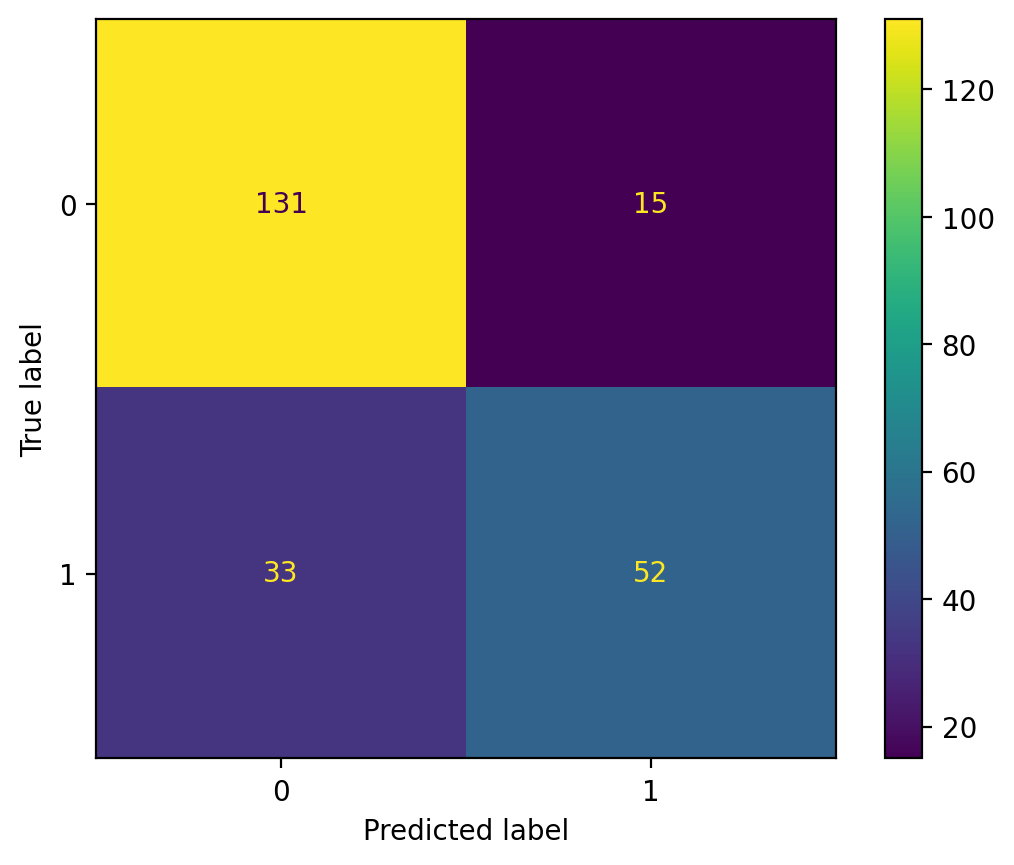

In [ ]:
#@title More Evaluation Metrics

print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();

